In [44]:
import cluster
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df, lat_long = cluster.get_data()

In [3]:
df.shape

(73424, 61)

In [4]:
df2 = cluster.make_structure_data(df)

In [5]:
df2.shape

(65266, 11)

In [11]:
train, test = cluster.split_data(df2)

In [12]:
train.shape

(52212, 9)

In [13]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,heatingorsystemtypeid,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,logerror
72193,4.5,4.0,3458.0,2.0,4719.0,2013.0,620885.0,1290424.0,0.037904
12203,1.0,3.0,973.0,7.0,5717.0,1952.0,20474.0,39915.0,0.134868
1581,2.0,3.0,1292.0,2.0,6915.0,1986.0,66557.0,88742.0,0.033469
62782,2.0,4.0,2356.0,2.0,8674.0,1959.0,204174.0,654564.0,0.027875
14477,3.0,3.0,3210.0,2.0,87195.0,1999.0,514915.0,691754.0,-0.012186


In [14]:
std_train, std_test, blob = cluster.standardize_train_test(train,test)

In [15]:
std_train.shape

(52212, 9)

In [35]:
df_with_clusters = cluster.make_clusters(std_train)

In [36]:
df_with_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52212 entries, 72193 to 59343
Data columns (total 12 columns):
bathroomcnt                     52212 non-null float64
bedroomcnt                      52212 non-null float64
calculatedfinishedsquarefeet    52212 non-null float64
heatingorsystemtypeid           52212 non-null float64
lotsizesquarefeet               52212 non-null float64
yearbuilt                       52212 non-null float64
structuretaxvaluedollarcnt      52212 non-null float64
taxvaluedollarcnt               52212 non-null float64
logerror                        52212 non-null float64
cluster_labels                  52212 non-null int32
latitude                        52212 non-null float64
longitude                       52212 non-null float64
dtypes: float64(11), int32(1)
memory usage: 5.0 MB


In [18]:
np.unique(df_with_clusters.cluster_labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([11385,  5643, 35184]))

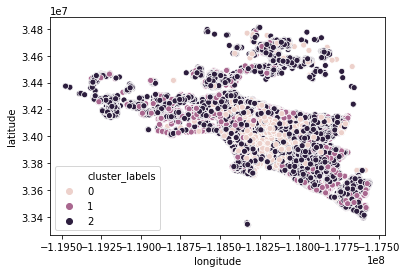

In [19]:
cluster.show_clusters_on_map(df_with_clusters)

## EXPLORE THESE CLUSTERS

In [32]:
df_with_clusters.groupby('cluster_labels').mean()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,heatingorsystemtypeid,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,logerror,latitude,longitude
cluster_labels,,,,,,,,,,,
0,-0.877008,-0.496902,-0.621617,1.752896,-0.152701,-1.078212,-0.432480,-0.297856,-0.019354,3.401944e+07,-1.182193e+08
1,1.805226,1.301566,2.043745,-0.454020,-0.088505,0.756204,1.783459,1.558861,0.108561,3.397996e+07,-1.182232e+08
2,-0.005746,-0.047963,-0.126641,-0.494392,0.063607,0.227609,-0.146097,-0.153637,-0.011149,3.404737e+07,-1.182252e+08


In [39]:
rich_houses = df_with_clusters[df_with_clusters.cluster_labels == 0]

In [54]:
poor_houses = df_with_clusters[df_with_clusters.cluster_labels == 1]
std_houses = df_with_clusters[df_with_clusters.cluster_labels == 2]

In [52]:
poor_houses.shape

(24057, 12)

In [53]:
std_houses.shape

(24057, 12)

In [21]:
df_with_clusters.logerror.mean()

-1.5043307219774666e-17

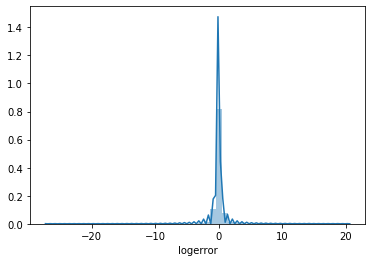

In [25]:
sns.distplot(df_with_clusters.logerror)

(-2, 2)

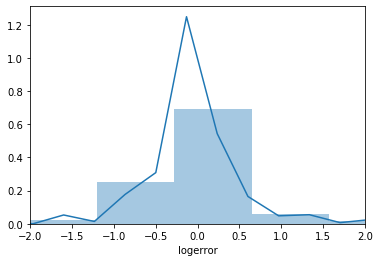

In [55]:
sns.distplot(rich_houses.logerror)
plt.xlim(-2,2)

(-2, 2)

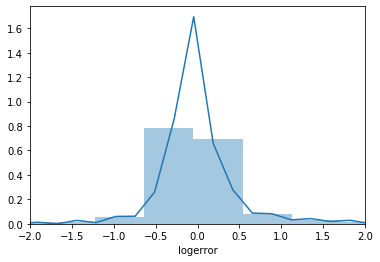

In [56]:
sns.distplot(std_houses.logerror)
plt.xlim(-2,2)

(-2, 2)

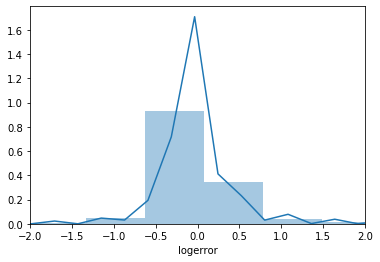

In [57]:
sns.distplot(poor_houses.logerror)
plt.xlim(-2,2)